In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from io import StringIO

In [3]:
df = pd.read_csv(r'C:\Users\asus\Documents\COLLEGE LIFE\SEMESTER 5\DATA MINING\heart.csv', sep = '\t')
df.head()

,"age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output"
0,"63,1,3,145,233,1,0,150,0,2.3,0,0,1,1"
1,"37,1,2,130,250,0,1,187,0,3.5,0,0,2,1"
2,"41,0,1,130,204,0,0,172,0,1.4,2,0,2,1"
3,"56,1,1,120,236,0,1,178,0,0.8,2,0,2,1"
4,"57,0,0,120,354,0,1,163,1,0.6,2,0,2,1"


In [21]:
#Data Preparation / Cleaning
dataset = {
    'Age': [63, 37, 41, 56, 57],
    'Sex': [1, 1, 0, 1, 0],
    'cp': [145, 130, 130, 120, 120],
    'trtbps': [233, 250, 204, 236, 354],
    'chol': [233, 250, 204, 236, 354],
    'fbs': [1, 0, 0, 0, 0],
    'restecg': [0, 1, 0, 1, 1],
    'thalachh': [150, 187, 172, 178, 163],
    'exng': [0, 0, 0, 0, 1],
    'oldpeak': [2.3, 3.5, 1.4, 0.8, 0.6],
    'slp': [0, 0, 2, 2, 2],
    'caa': [0, 0, 0, 0, 0],
    'thall': [1, 2, 2, 2, 2],
    'output': [1, 1, 0, 1, 0],
}
df = pd.DataFrame(dataset)
df.head()

,Age,Sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,145,233,233,1,0,150,0,2.3,0,0,1,1
1,37,1,130,250,250,0,1,187,0,3.5,0,0,2,1
2,41,0,130,204,204,0,0,172,0,1.4,2,0,2,0
3,56,1,120,236,236,0,1,178,0,0.8,2,0,2,1
4,57,0,120,354,354,0,1,163,1,0.6,2,0,2,0


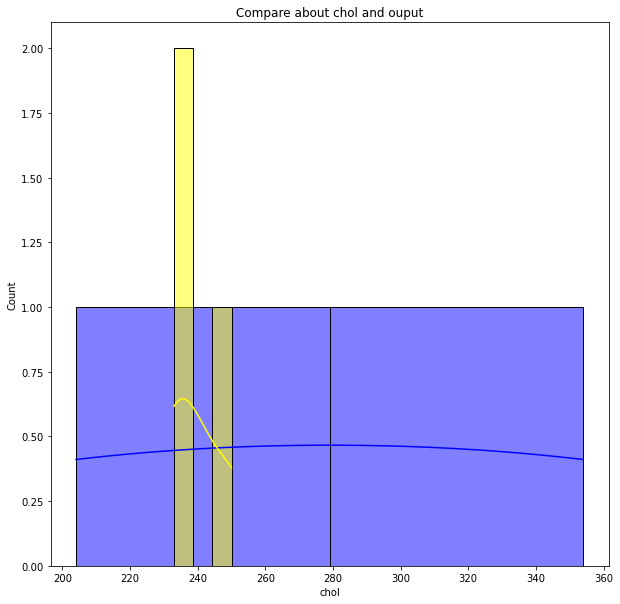

In [74]:
#Visualization (EDA) and Compare two different variables and provide short analysis (ex: gender and sex, gender and cp, cp and chol, etc.)
plt.figure(figsize = (10, 10))
sns.histplot(df[df['output'] == 0]['chol'], color = "blue", kde = True)
sns.histplot(df[df['output'] == 1]['chol'], color = "yellow", kde = True)
plt.title("Compare about chol and ouput")
plt.show()

In [104]:
#Scaling and Normalizing data
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [114]:
#Create model for analysis (Classification). Use XGBoost, K-Nearest Neighbor, Logistic Regression, Gaussian Naive Bayes, Bernoulli Naive Bayes, Support Vector Machine, Random Forest. (choose at least 3)
#Logistic Regression
y = df['output']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr = LogisticRegression()
lr.fit(X_train, y_train)
res = lr.predict(X_test)
acc = accuracy_score(y_test, res) * 100
conf_matrix = confusion_matrix(y_test, res)
print("Confusion Matrix:")
print(conf_matrix)
print("Logistic regression score:", acc)

Confusion Matrix:
[[1]]
Logistic regression score: 100.0


In [105]:
#XGBoost
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Score: %.2f%%" % (accuracy * 100.0))

XGBoost Score: 100.00%


In [106]:
#KNN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
print('KNN Score: ', knn.score(X_test, y_test))

KNN Score:  0.9666666666666667


In [ ]:
#Create short conclusion about the modeling results
Seseorang yang memiliki Cholestrol 240 memiliki kemungkinan heart attack lebih banyak daripada yang dibawah atau diatas 240.


